In [1]:
import numpy as np
from scipy.linalg import eig


In [2]:
def get_eig(M):
    D,V = eig(M, left=False, right=True)
    #print("V before sort:" + str(V))

    idx = D.argsort()[::-1]   
    D = D[idx]
    V = V[:,idx]
    #print("V before flip:" + str(V))

    D = np.flip(D)
    V = np.fliplr(V)
    #print("V post flip:" + str(V))
    return D,V

In [3]:
# def get_eig(M):
#     D,V = eig(M)
#     print("V before sort:" + str(V))

#     idx = D.argsort()[::-1]   
#     D = D[idx]
#     V = V[:,idx]
#     print("V before flip:" + str(V))

#     D = np.flip(D)
#     V = np.fliplr(V)
#     print("V post flip:" + str(V))
#     return D,V


In [4]:
def phi(x, j, V, sigma):
    
    n = np.size(V, 1)
    sig = np.zeros(n)

    for i in range(0, n-1):
        sig[i] = sigma(x - (i+1)/n)

    y = np.dot(sig, V[:, j])
    return y


In [5]:
def relu_basis(x,i=0):
    if x > (i-1)/n:
        return (x-(i-1)/n)*n
    else:
        return 0

In [6]:
def relu_basis_prime(x,i=0):
    if x > (i-1)/n:
        return n
    else:
        return 0

In [7]:
def hat_basis(x,i=0):
    if (i-1)/n <= x < i/n:
        return (x-(i-1)/n)*n
    elif i/n <= x <= (i+1)/n:
        return ((i+1)/n-x)*n
    else:
        return 0


In [8]:
def hat_basis_prime(x,i=0):
    if (i-1)/n <= x < i/n:
        return n
    elif i/n <= x <= (i+1)/n:
        return -n
    else:
        return 0

In [9]:
def tanh(x):
    return np.tanh(x)


In [10]:
def tanh_prime(x):
    return 1 - np.tanh(x)**2

In [24]:
def func(x,i,j,n,sigma):
    return sigma(x-(i/n))*sigma(x-(j/n))


In [25]:
from scipy.integrate import quad

def mass_matrix(sigma, n):
    M = np.zeros([n, n])
    for i in range(0, n):

        for j in range(0, n):
            M[i, j] = quad(func, 0, 1, args=(i+1, j+1, n,sigma), points=[i-1/n, i/n, i+1/n, j-1/n, j/n, j+1/n])[0]

    return M


In [13]:
import matplotlib.pyplot as plt

def plot_helper(x,y,sigma,l):
    fig, ax = plt.subplots()
    ax.plot(x, y/np.linalg.norm(y, np.inf))
    ax.set_title("Activation Function: {}; Eigenvalue position: {}".format(sigma.__name__, l+1))
    plt.show()
    return fig,ax


In [14]:
def get_y(x,n,m,V,sigma, show_plot = "False"):

    for l in range(0, n): 
        y = np.zeros_like(x)

        for k in range(0, m): 
            y[k] = phi(x[k], l, V, sigma)

        if l==0 and show_plot == "True":
            plot_helper(x,y,sigma,l)

        elif (l+1)%25 ==0 and show_plot == "True":
            plot_helper(x,y,sigma,l)
            
    return y


In [26]:
n = 5
h = 1/n
m = 100
x = np.linspace(0, 1, m)

M = 4*np.diag(np.ones(n), k=0) + np.diag(np.ones(n-1), k=-1)+np.diag(np.ones(n-1), k=1)
M[n-1][n-1] = 2
M = h/6*(M)

C1 = np.diag(np.ones(n))

for j in range(1, n):
    C1 = C1 + (j+1)*np.diag(np.ones(n-j), j)
    
M_psi = C1@M@C1.T


In [27]:
M_psi

array([[8.33333333, 5.86666667, 3.6       , 1.73333333, 0.46666667],
       [5.86666667, 4.26666667, 2.7       , 1.33333333, 0.36666667],
       [3.6       , 2.7       , 1.8       , 0.93333333, 0.26666667],
       [1.73333333, 1.33333333, 0.93333333, 0.53333333, 0.16666667],
       [0.46666667, 0.36666667, 0.26666667, 0.16666667, 0.06666667]])

In [28]:
#M_hat = mass_matrix(hat_basis, n)
M_relu = mass_matrix(relu_basis, n)
##M_hat_prime = mass_matrix(hat_basis_prime, n)
#M_relu_prime = mass_matrix(relu_basis_prime, n)

#M_tanh = mass_matrix(tanh, n)
#M_tanh_prime = mass_matrix(tanh_prime, n)


In [29]:
M_relu

array([[8.33333333, 5.86666667, 3.6       , 1.73333333, 0.46666667],
       [5.86666667, 4.26666667, 2.7       , 1.33333333, 0.36666667],
       [3.6       , 2.7       , 1.8       , 0.93333333, 0.26666667],
       [1.73333333, 1.33333333, 0.93333333, 0.53333333, 0.16666667],
       [0.46666667, 0.36666667, 0.26666667, 0.16666667, 0.06666667]])

In [19]:
D_hat, V_hat = get_eig(M_hat)
D,V = get_eig(M)

D_psi,V_psi = get_eig(M_psi)
D_relu, V_relu = get_eig(M_relu)
D_hat_prime, V_hat_prime = get_eig(M_hat_prime)
D_relu_prime, V_relu_prime = get_eig(M_relu_prime)

D_tanh, V_tanh = get_eig(M_tanh)
D_tanh_prime, V_tanh_prime = get_eig(M_tanh_prime)

NameError: name 'M_hat' is not defined

In [ ]:
hat_y =get_y(x,n,m,V,hat_basis, show_plot = "True")

In [ ]:
hat_quad_y = get_y(x,n,m,V_hat,hat_basis, show_plot = "True")# 

In [ ]:
relu_mat_y = get_y(x,n,m,V_psi,relu_basis, show_plot = "True")

In [ ]:
relu_quad_y = get_y(x,n,m,V_relu,relu_basis, show_plot = "True")

In [ ]:
hat_prime_y = get_y(x,n,m,V_hat_prime,hat_basis_prime, show_plot = "True")

In [ ]:
relu_prime = get_y(x,n,m,V_relu_prime,relu_basis_prime, show_plot = "True")

/tmp/ipykernel_1244/143468273.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  y[k] = phi(x[k], l, V, sigma)


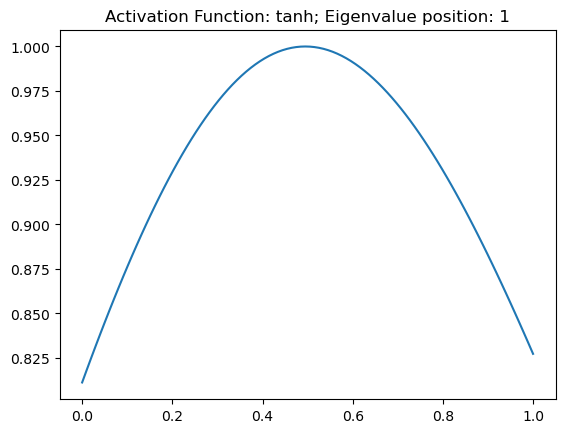

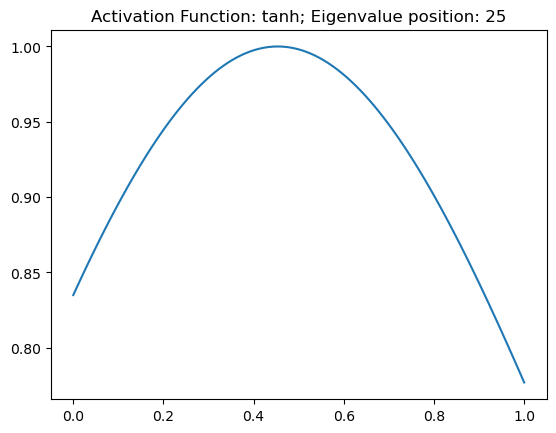

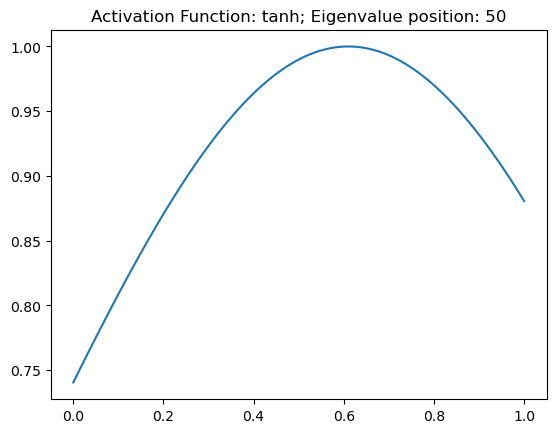

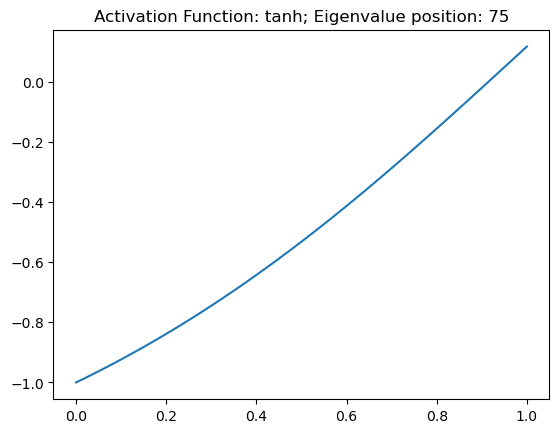

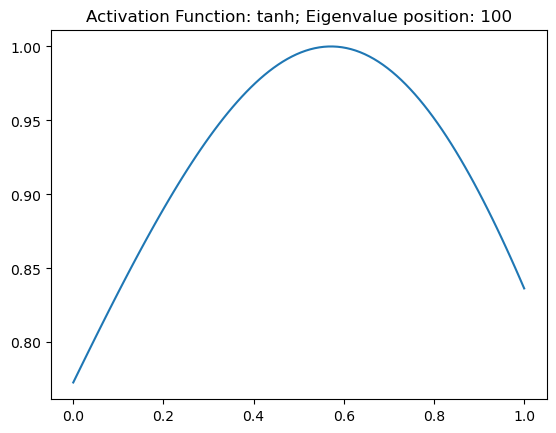

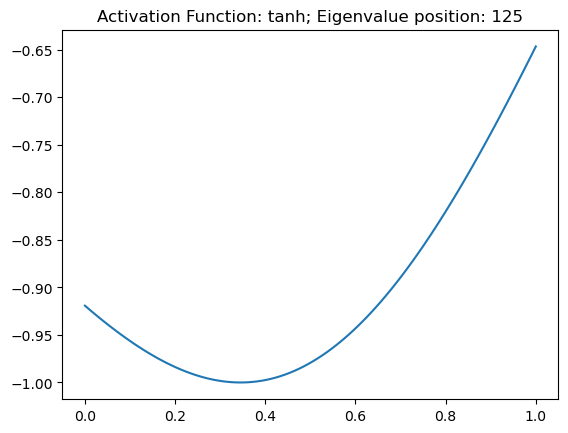

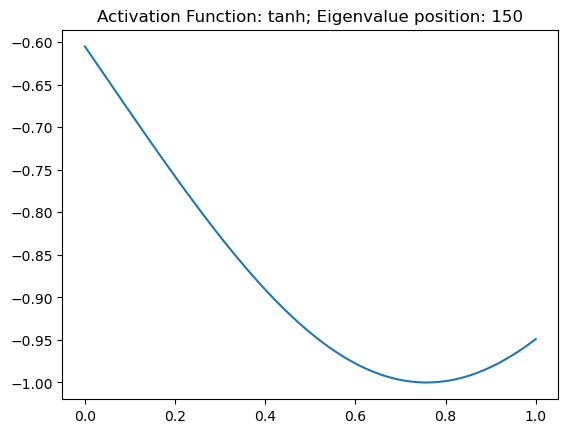

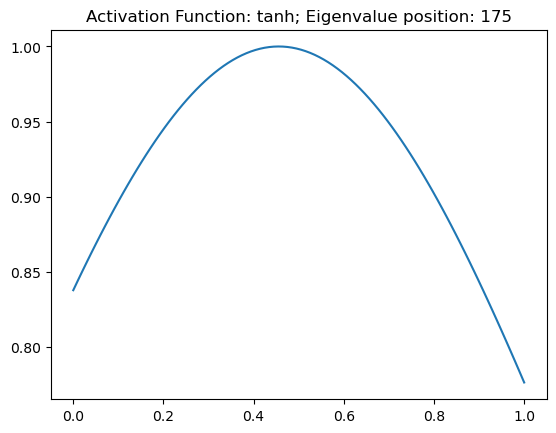

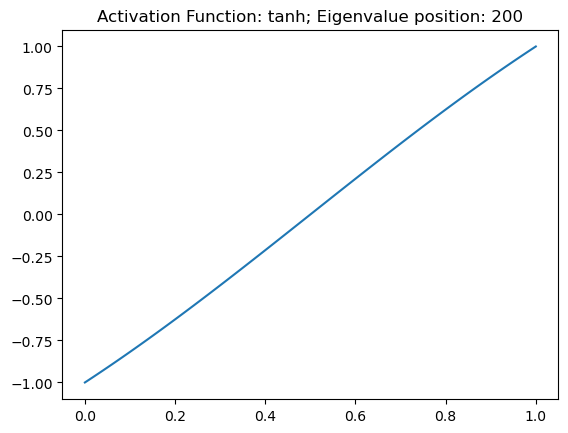

In [ ]:
tanh_y = get_y(x,n,m,V_tanh,tanh, show_plot = "True")

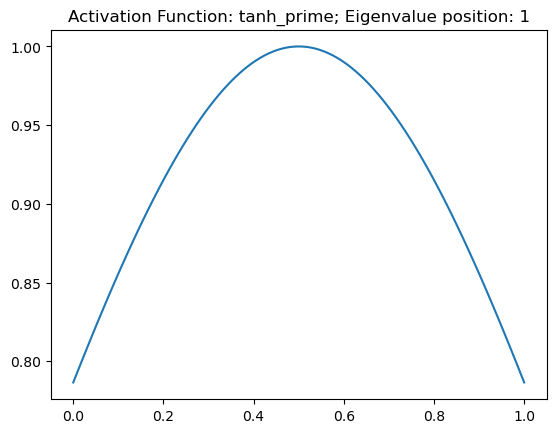

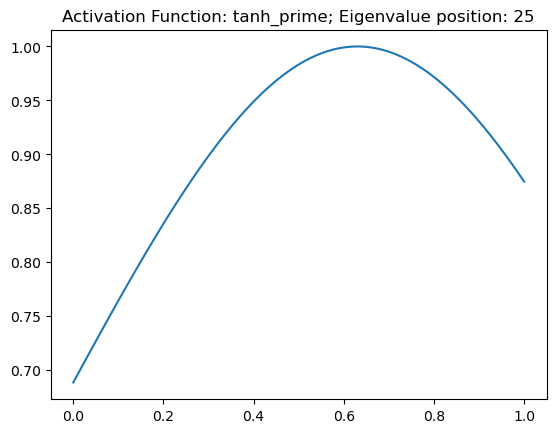

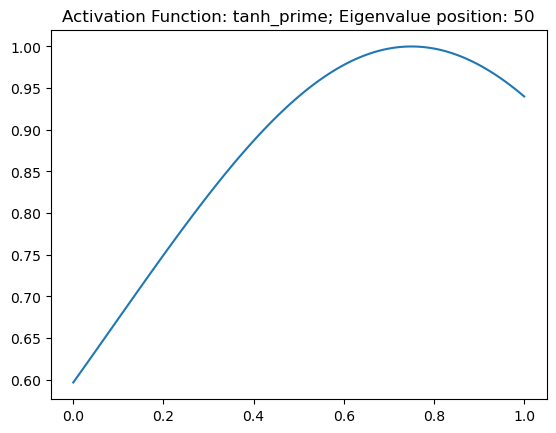

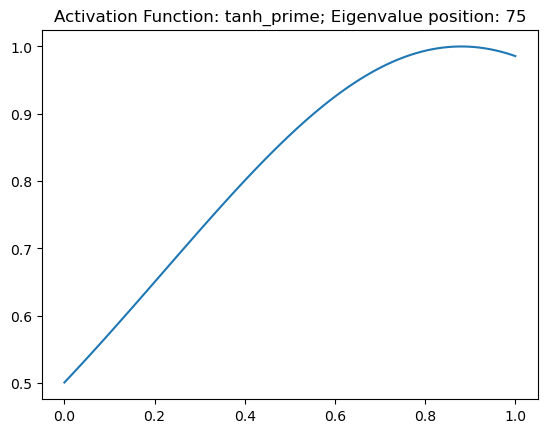

/tmp/ipykernel_1244/3477489336.py:5: RuntimeWarning: invalid value encountered in divide
  ax.plot(x, y/np.linalg.norm(y, np.inf))


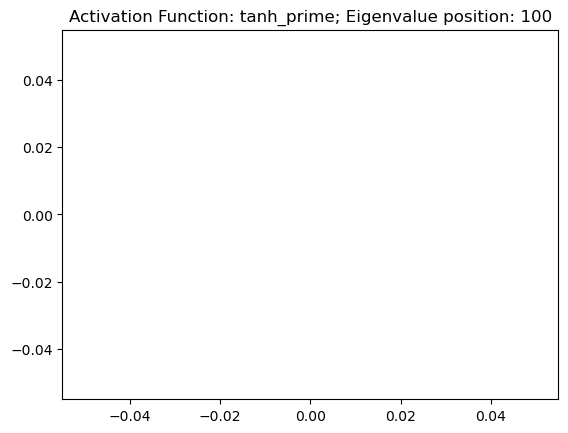

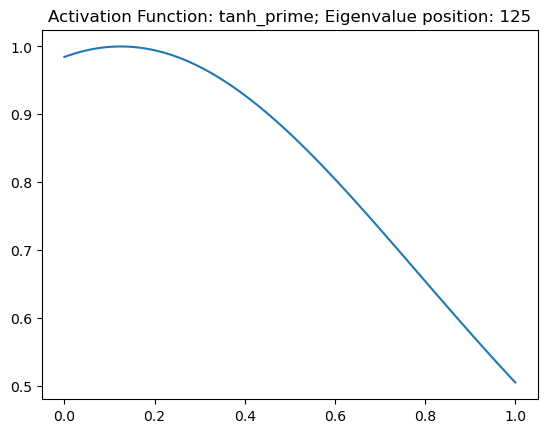

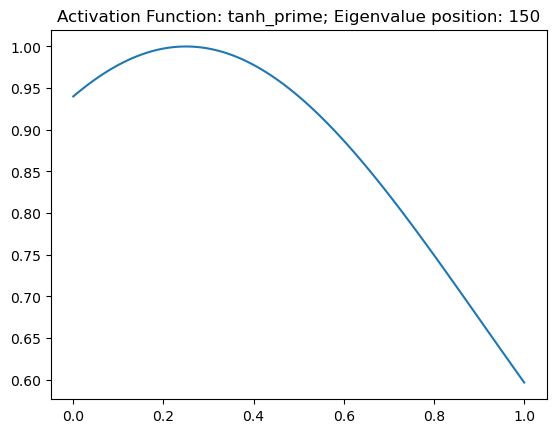

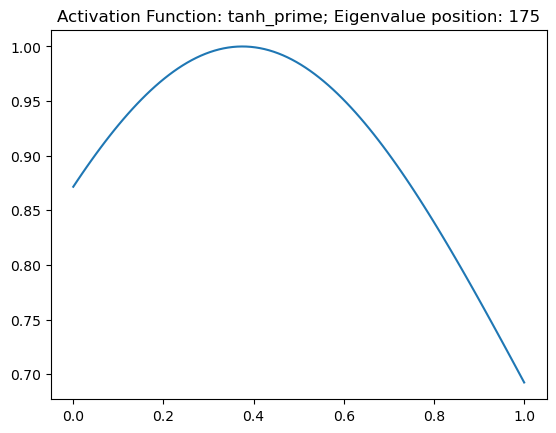

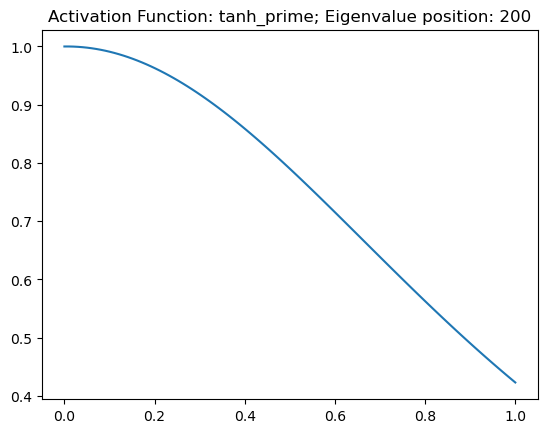

In [ ]:
tanh_prime_y = get_y(x,n,m,V_tanh_prime,tanh_prime, show_plot = "True")